In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [7]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip -O bank-marketing.zip

--2024-10-14 20:31:44--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-marketing.zip’

bank-marketing.zip      [    <=>             ] 999.85K  1.01MB/s    in 1.0s    

2024-10-14 20:31:46 (1.01 MB/s) - ‘bank-marketing.zip’ saved [1023843]



In [2]:
import zipfile

# Extract 'bank.zip' from 'bank-marketing.zip'
with zipfile.ZipFile('bank-marketing.zip', 'r') as zip_ref:
    zip_ref.extract('bank.zip')

print("bank.zip extracted successfully.")

bank.zip extracted successfully.


In [3]:
# Now extract 'bank-full.csv' from 'bank.zip'
with zipfile.ZipFile('bank.zip', 'r') as bank_zip_ref:
    print(bank_zip_ref.namelist())  # This will show the contents of bank.zip
    
    # Extract 'bank-full.csv'
    bank_zip_ref.extract('bank-full.csv')

print("bank-full.csv extracted successfully.")

['bank-full.csv', 'bank-names.txt', 'bank.csv']
bank-full.csv extracted successfully.


In [4]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [7]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [8]:
df.y.isnull().sum()

np.int64(0)

In [9]:
df.y = (df.y == 'yes').astype(int)

In [17]:
columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
           'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[columns]

In [18]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [19]:
# Find the mode for 'education'
education_mode = df['education'].mode()[0]
print(education_mode)

secondary


In [21]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

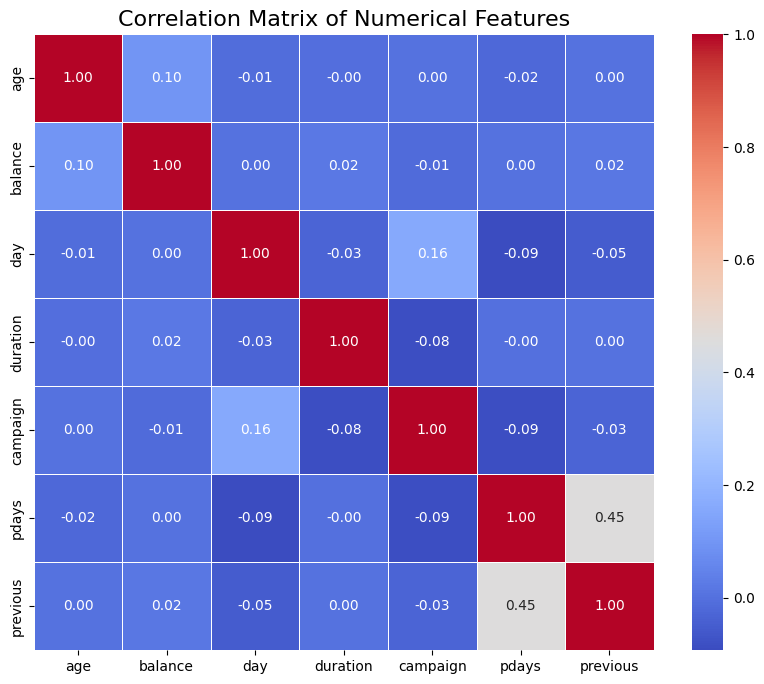

In [22]:
# Select only the numerical features for correlation
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and display the plot
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [25]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [28]:
df_full_train = df_full_train.reset_index(drop=True)

In [29]:
df_full_train.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [33]:
df_full_train.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [34]:
df_full_train.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [35]:
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [36]:
numerical = ['age', 'balance',
       'day', 'duration', 'campaign', 'pdays', 'previous']

In [37]:
from sklearn.metrics import mutual_info_score

In [39]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.y)

In [46]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False).round(2)

poutcome     0.03
month        0.02
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64

In [49]:
from sklearn.feature_extraction import DictVectorizer

In [50]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [51]:
from sklearn.linear_model import LogisticRegression

In [61]:
# Fit the model on the scaled data
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
y_pred_val = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)

In [65]:
accuracy

0.1234240212342402

In [74]:
# Check the shape of X_train
print(X_train.shape)  # Should print something like (27126, 47)

# Check the number of feature names
feature_names = df.drop(columns='y').columns.tolist()
print(len(feature_names))  # Should print 47 to match X_train's columns
print(feature_names)  # To see what the feature names are

(27126, 47)
14
['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [77]:
# Convert to DataFrame if X_train and X_val are NumPy arrays
# Assuming df is your original DataFrame and 'y' is your target variable
feature_names = df.drop(columns='y').columns.tolist()

X_train = pd.DataFrame(X_train, columns = feature_names)  # feature_names should be your original feature names
X_val = pd.DataFrame(X_val, columns = feature_names)

# Train model with all features
baseline_accuracy = accuracy_score(y_val, model.predict(X_val))

# List to store accuracy drops
accuracy_drops = []

# Loop through each feature, remove it, and train a model
for col in X_train.columns:  # Loop through the column names
    X_train_subset = X_train.drop(col, axis=1)
    X_val_subset = X_val.drop(col, axis=1)
    
    # Train model without this feature
    model.fit(X_train_subset, y_train)
    accuracy_without_feature = accuracy_score(y_val, model.predict(X_val_subset))
    
    # Calculate accuracy drop
    accuracy_drops[col] = baseline_accuracy - accuracy_without_feature

# Find the feature with the smallest accuracy drop
least_useful_feature = min(accuracy_drops, key=accuracy_drops.get)
print(least_useful_feature)

ValueError: Shape of passed values is (27126, 47), indices imply (27126, 14)